<a href="https://colab.research.google.com/github/7ft10/C4ArchitectureExamples/blob/main/C4_Architecture_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C4 Architecture Examples

In [146]:
#@title Install Diagrams
!pip install diagrams &> /dev/null

In [137]:
#@title Default Settings

from diagrams import Diagram
from diagrams.c4 import Person, Container, Database, System, SystemBoundary, Relationship
from diagrams.custom import Custom
from IPython.display import SVG, display, Image

#@markdown + Graph Attributes
global_graph_attr = {
  "splines": "spline",
  "fontsize": "10",
  "bgcolor": "transparent"
}

#@markdown + Node Attributes
global_node_attr = {
  "fontsize": "8px",
  "width": "1.8"#,
  #"height": "1.4"
}

In [138]:
#@title Respository
from urllib.request import urlretrieve

#@markdown ----------------------------------------------
#@markdown # Our Systems
class OurSystems():

  #@markdown + Web Application (WebApp)
  def WebApp(): 
    return {
      "name" : "Web Application", 
      "technology" : "Java and Spring MVC", 
      "description" : "Delivers the static content and the Internet banking single page application.",
      "tech-radar-ring" : "adopt",
      "tech-radar-quadrant" : "tools",
      "isNew" : "TRUE"
    }

  #@markdown + Single Page Application (SPA)
  def SPA(): 
    return { 
      "name" : "Single-Page Application",
      "technology" : "Javascript and Angular",
      "description" : "Provides all of the Internet banking functionality to customers via their web browser.",
    }

  #@markdown + Mobile Application (MobileApp)
  def MobileApp(): 
    return { 
      "name" : "Mobile App",
      "technology" : "Xamarin",
      "description" : "Provides a limited subset of the Internet banking functionality to customers via their mobile device.",
    }

  #@markdown + Application Programming Interface (API)
  def API():
    return { 
      "name" : "API Application",
      "technology" : "Java and Spring MVC",
      "description" : "Provides Internet banking functionality via a JSON/HTTPS API.",
    }

  #@markdown + Customer Application (CustomerA)
  def CustomA():
    diagrams_icon = "diagrams.png"
    urlretrieve("https://github.com/mingrammer/diagrams/raw/master/assets/img/diagrams.png", diagrams_icon)
    return { 
      "label" : "Custom Application",
      "icon_path" : diagrams_icon
    }

#@markdown ---
#@markdown # Our Data Stores
class OurDataStores(): 

  #@markdown + Oracle Database (OracleDB)
  def OracleDB(): 
    return { 
      "name" : "Oracle DB",
      "technology" : "Oracle Database",
      "description" : "Stores user registration information, hashed authentication credentials, access logs, etc.",
    }

#@markdown ----------------------------------------------
#@markdown # Our External Systems
class OurExternalSystems(): 

  #@markdown + E-mail System (Email)
  def Email(): 
    return { 
      "name" : "E-mail System", 
      "description" : "The internal Microsoft Exchange e-mail system.", 
      "external" : True
    }

  #@markdown + Mainframe Banking System (Mainframe)
  def Mainframe(): 
    return { 
      "name" : "Mainframe Banking System",
      "description" : "Stores all of the core banking information about customers, accounts, transactions, etc.",
      "external" : True
    }

#@markdown ----------------------------------------------
#@markdown # Our Personas
class OurPersonas(): 

  #@markdown + Banking Customer (BankingCustomer)
  def BankingCustomer(): 
    return {
      "name" : "Personal Banking Customer", 
      "description" : "A customer of the bank, with personal bank accounts."
    }


In [139]:
#@title Internet Banking System Context Diagram
internet_banking_system_settings =  {
  "name": "Internet Banking System Context Diagram", 
  "outformat": "svg",  
  "direction": "TB", 
  "graph_attr": global_graph_attr, 
  "node_attr": global_node_attr
}

with Diagram(** internet_banking_system_settings) as internet_banking_system_context_diagram:
  
  #@markdown ----------------------------------------------
  #@markdown ## Personas

  #@markdown + BankingCustomer
  customer = Person( **OurPersonas.BankingCustomer() )

  #@markdown ----------------------------------------------
  #@markdown ## Context

  #@markdown System: Internet Banking System
  with SystemBoundary("Internet Banking System"):
    #@markdown + WebApp
    webapp = Container( **OurSystems.WebApp() )

    #@markdown + SPA
    spa = Container( **OurSystems.SPA() ) 

    #@markdown + MobileApp
    mobileapp = Container( **OurSystems.MobileApp() ) 

    #@markdown + API
    api = Container( **OurSystems.API() )

    #@markdown + OracleDB
    database = Database( **OurDataStores.OracleDB() )

    #@markdown + CustomA
    diagrams = Custom( **OurSystems.CustomA() )

  #@markdown ----------------------------------------------
  #@markdown ## External Systems   

  #@markdown + Email
  email = System( **OurExternalSystems.Email() )

  #@markdown + Mainframe
  mainframe = System( **OurExternalSystems.Mainframe() )

  #@markdown ----------------------------------------------
  #@markdown ## Relationships
  #@markdown Shown in code
  customer >> Relationship("Visits bigbank.com/ib using [HTTPS]") >> webapp
  customer >> Relationship("Views account balances, and makes payments using") >> [spa, mobileapp]
  webapp >> Relationship("Delivers to the customer's web browser") >> spa
  spa >> Relationship("Make API calls to [JSON/HTTPS]") >> api
  mobileapp >> Relationship("Make API calls to [JSON/HTTPS]") >> api

  api >> Relationship("reads from and writes to") >> database
  api >> Relationship("Sends email using [SMTP]") >> email
  api >> Relationship("Makes API calls to [XML/HTTPS]") >> mainframe
  customer << Relationship("Sends e-mails to") << email

#@markdown ----------------------------------------------
#@markdown ![Internet Banking System Context Diagram]([internet_banking_system_context_diagram])
## ------------------------------------------------------  
##internet_banking_system_context_diagram

In [140]:
#@markdown ![pp](attachment:/content/internet_banking_system_context_diagram.svg)

In [141]:
#@markdown ![pp](/content/internet_banking_system_context_diagram.svg)

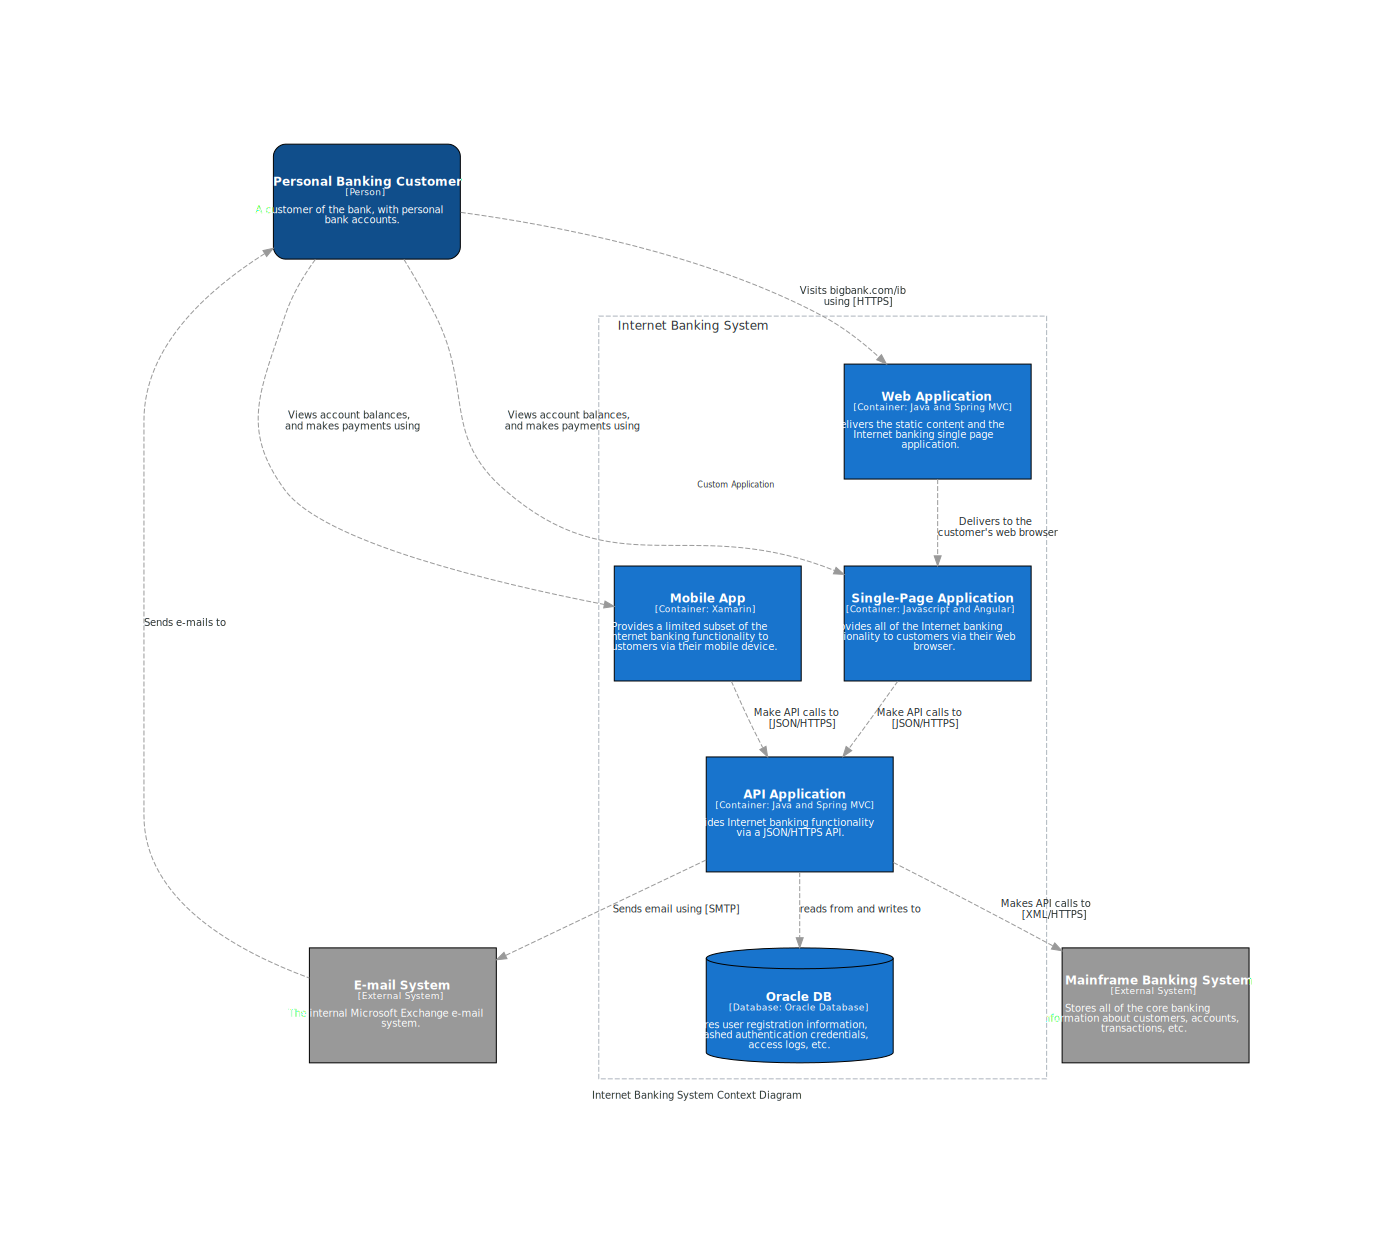

In [142]:
SVG('/content/internet_banking_system_context_diagram.svg')